<a href="https://colab.research.google.com/github/s-im-ran/Machine-Learning/blob/main/2_MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To predict the salary using Multiple Regression.

In [ ]:
import numpy as mp
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/My Drive/salary.csv')

In [ ]:

data.shape

(375, 6)

In [ ]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

49

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(324, 6)

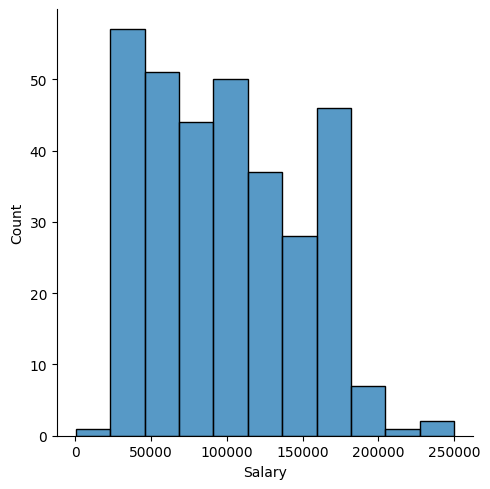

In [ ]:
sns.displot(data['Salary'])

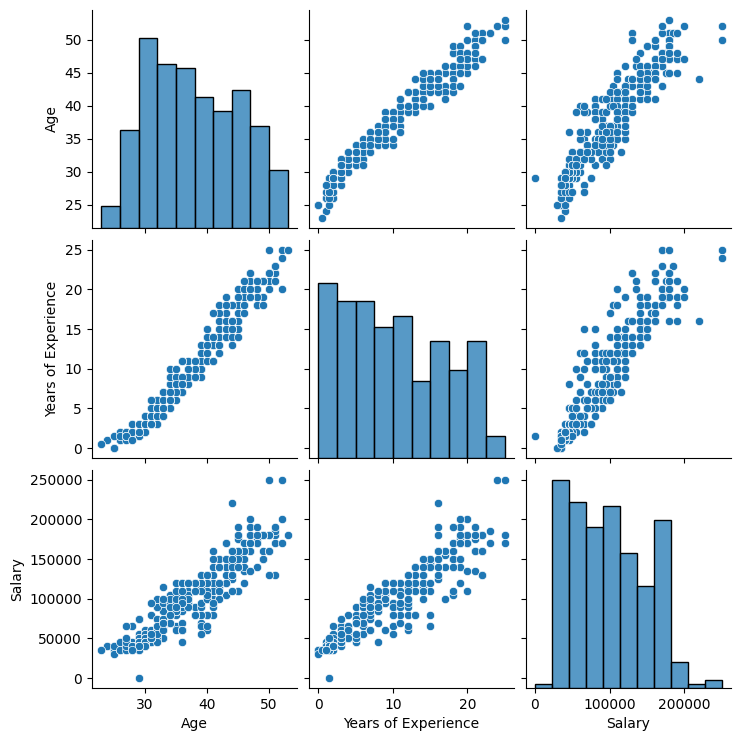

In [ ]:


sns.pairplot(data)

In [ ]:

data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
gender_label = LabelEncoder()
data['Gender']=gender_label.fit_transform(data['Gender'])
edu_label_encoder = LabelEncoder()
data['Education Level'] = edu_label_encoder.fit_transform(data['Education Level'])
job_title_encoder = LabelEncoder()
data['Job Title']=job_title_encoder.fit_transform(data['Job Title'])


In [ ]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


In [ ]:

X=data.drop('Salary',axis=1)

In [ ]:
y=data['Salary']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(259, 5)

In [ ]:
y_train.shape


(259,)

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

In [ ]:
print(f"Mean Squared error :{mse}")
print(f"R2 score ={r2}")

Mean Squared error :205754135.7172614
R2 score =0.8924655327693671


In [ ]:
lr.score(X_test,y_test)

0.8911231066517087

In [ ]:
y_test.head(6)

132    100000.0
108    100000.0
137     50000.0
9      110000.0
181    105000.0
126     95000.0
Name: Salary, dtype: float64

In [ ]:
lr.predict(X_test.iloc[4].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([109469.])